In [1]:
import pandas as pd
import psycopg2
import json

In [2]:
with open('redshift_cred.json', 'r') as json_file:
    credentials = json.load(json_file)

In [3]:
def connect_to_redshift():
    try:
        conn = psycopg2.connect(
            **credentials
        )
        print("Connected to Redshift")
        return conn
    except Exception as e:
        print("Error: Unable to connect to Redshift")
        print(e)

In [4]:
def fetch_data(conn, query):
    with conn.cursor() as cur:
        cur.execute(query)
        result = cur.fetchall()
        return result

In [5]:
conn = connect_to_redshift()

Connected to Redshift


In [ ]:
retention_df = pd.read_sql("select * from content_analytics.course_template_assignments", conn)

/var/folders/bg/92qc2wfn1wd57tm7ktlqdbqw0000gq/T/ipykernel_5090/1250900360.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  retention_df = pd.read_sql("select * from content_analytics.course_template_assignments", conn)


In [11]:
retention_df.head()

,course_id,course_term,course_year,isbn,isbn_title,template_version,template_key_id,template_course_term_taught_key,assignment_id,latest_template_assignment_id,...,student_tot_sum_min,student_tot_count,sum_questions_presented,sum_attempts_on_items,course_student_count,instructor_cnt_who_launched,student_cnt_who_launched,instructor_terms_taught,ryan_tool_type,foundry_extract_ts
0,6b573377-dbdb-4de5-b019-19e0fc93a32a,fall,2023,9781319329570,Achieve for Modern Principles: Macroeconomics ...,10,9781319329570-10-8ab91f87-3efb-4ed0-a2b0-cf76b...,9781319329570-10-fall-2023-3,c24c361a-f07e-4988-9e95-aefb16e5fdc5,8ab91f87-3efb-4ed0-a2b0-cf76bce61b5d,...,NaN,NaN,NaN,NaN,45,0,8,3,in_class_activity_guide,2023-12-21 17:52:21
1,d4b347a4-feb1-4d19-ab30-5425164243d1,spring,2020,9781319252922,Achieve for Principles of Microeconomics (1-Te...,0,None,9781319252922-0-spring-2020-1,c24e64c0-4008-4df1-9b8b-8e293977d945,None,...,NaN,0.0,NaN,NaN,156,0,2,1,in_class_activity_guide,2023-12-21 17:52:21
2,98100a7a-7bb4-4aca-8937-bc415e5f7554,fall,2023,9781319433550,Achieve for Exploring Psychology in Modules (1...,12,9781319433550-12-58271368-035d-445b-8e96-fd4e1...,9781319433550-12-fall-2023-1,c257acad-571d-4b81-b206-a574818fb955,58271368-035d-445b-8e96-fd4e183ee68a,...,NaN,NaN,NaN,NaN,360,0,0,1,in_class_activity_guide,2023-12-21 17:52:21
3,b460019e-d13d-400b-aee3-469e27856e9b,summer,2021,9781319252922,Achieve for Principles of Microeconomics (1-Te...,5,9781319252922-5-e4e7e822-24b6-455f-8af7-83d597...,9781319252922-5-summer-2021-3,b1db78fa-e3c1-4b0b-9fea-7eba9c1d18f4,e4e7e822-24b6-455f-8af7-83d59761d900,...,NaN,NaN,NaN,NaN,22,0,0,3,in_class_activity_guide,2023-12-21 17:52:21
4,c583ec32-5fd4-4905-bafb-4e6fefd288ee,spring,2022,9781319344641,Achieve for The Basic Practice of Statistics (...,12,9781319344641-12-297b0c29-081d-4464-8fad-9583c...,9781319344641-12-spring-2022-1,b1eaf3d5-a5fe-4e24-822c-0163e6118f6b,297b0c29-081d-4464-8fad-9583c68b52d7,...,NaN,0.0,NaN,NaN,20,0,1,1,in_class_activity_guide,2023-12-21 17:52:21


In [12]:
retention_df.columns

Index(['course_id', 'course_term', 'course_year', 'isbn', 'isbn_title',
       'template_version', 'template_key_id',
       'template_course_term_taught_key', 'assignment_id',
       'latest_template_assignment_id', 'activity_id', 'tool',
       'is_template_activity', 'is_prebuilt', 'assignment_due_at',
       'visibility_available_date', 'learning_path',
       'template_sub_folder_name', 'template_folder_name',
       'template_assignment_name', 'chapter', 'assignment_type',
       'student_with_grades', 'grade_sum', 'assigned_points',
       'student_tot_sum_min', 'student_tot_count', 'sum_questions_presented',
       'sum_attempts_on_items', 'course_student_count',
       'instructor_cnt_who_launched', 'student_cnt_who_launched',
       'instructor_terms_taught', 'ryan_tool_type', 'foundry_extract_ts'],
      dtype='object')

In [13]:
print(retention_df['student_cnt_who_launched'].sum())
print(retention_df['course_student_count'].sum())

75281106
253071679


Approx 30% of students are launching the assignments from all the students in the class

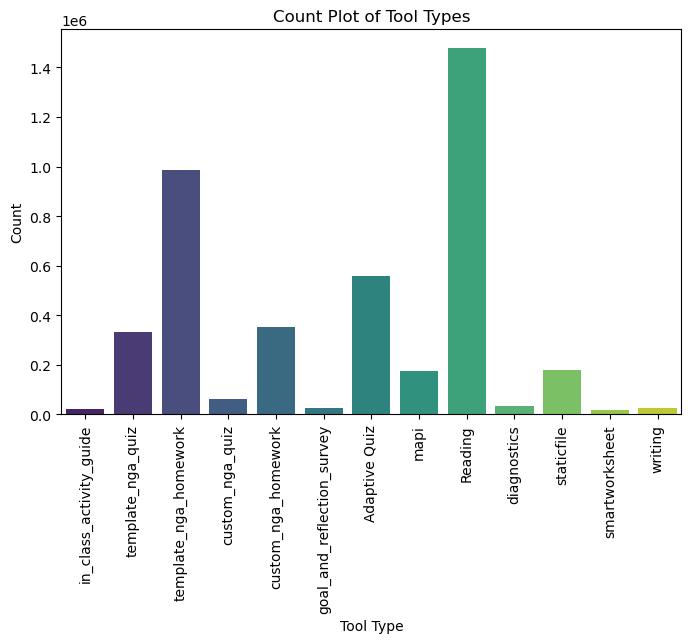

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
grouped_data = retention_df.groupby('ryan_tool_type')['instructor_cnt_who_launched'].sum().reset_index()



# Plotting
plt.figure(figsize=(8, 5))
sns.countplot(x='ryan_tool_type', data=retention_df, palette='viridis')
plt.xlabel('Tool Type')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Count Plot of Tool Types')
plt.show()

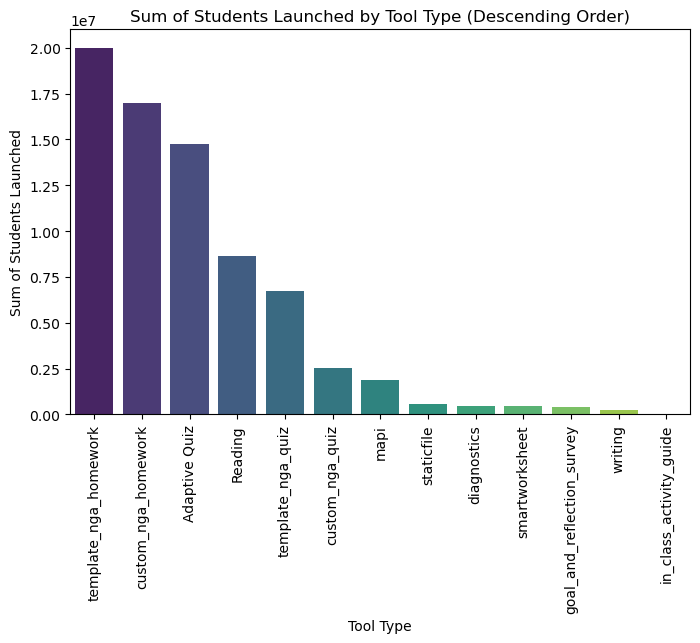

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping and calculating sum
grouped_data = retention_df.groupby('ryan_tool_type')['student_cnt_who_launched'].sum().reset_index()

# Sorting the data in descending order based on the sum
grouped_data = grouped_data.sort_values(by='student_cnt_who_launched', ascending=False)

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(x='ryan_tool_type', y='student_cnt_who_launched', data=grouped_data, palette='viridis')
plt.xlabel('Tool Type')
plt.xticks(rotation=90)
plt.ylabel('Sum of Students Launched')
plt.title('Sum of Students Launched by Tool Type (Descending Order)')
plt.show()

Instructors are launching Reading assignments the most

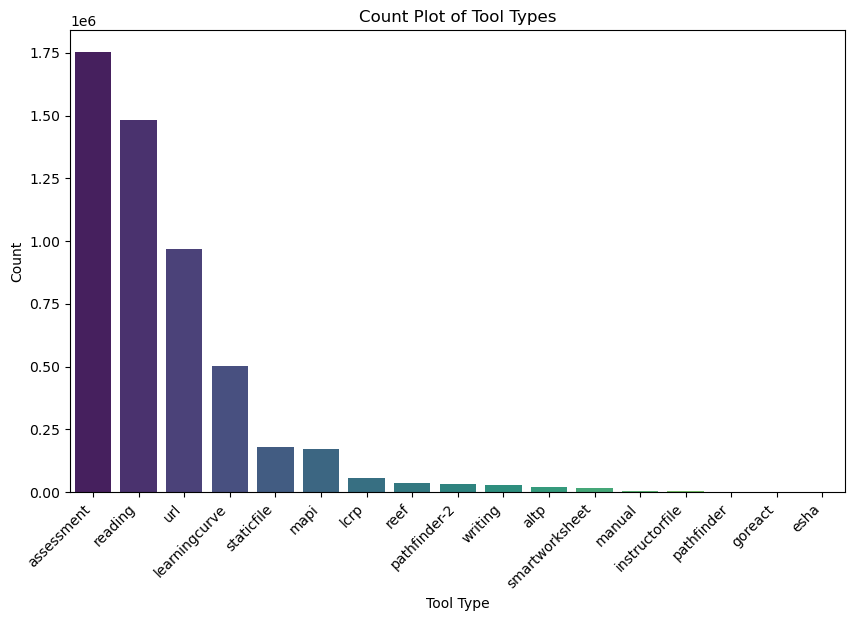

In [18]:
tool_type_counts = retention_df['tool'].value_counts()

# Sort the tool types based on counts in descending order
sorted_tool_types = tool_type_counts.index

# Plotting
plt.figure(figsize=(10, 6))
sns.countplot(x='tool', data=retention_df, order=sorted_tool_types, palette='viridis')
plt.xlabel('Tool Type')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.title('Count Plot of Tool Types')
plt.show()

url - Uniform Resource Identifier.
mapi - Video assignments
lcrp - Adaptive Quiz learning curve
reef -
altp - Accelerated Learning (in class activity guide)
esha - 

In [19]:
tool_type_of_interest = 'Reading'

# Filter the DataFrame for the specified tool type
filtered_data = retention_df[retention_df['ryan_tool_type'] == tool_type_of_interest]

# Calculate the sum of students for the specified tool type
sum_of_students = filtered_data['student_cnt_who_launched'].sum()

# Display the result
print(f"Sum of students for {tool_type_of_interest}: {sum_of_students}")

Sum of students for Reading: 8629686


Note
students_launched/student_count

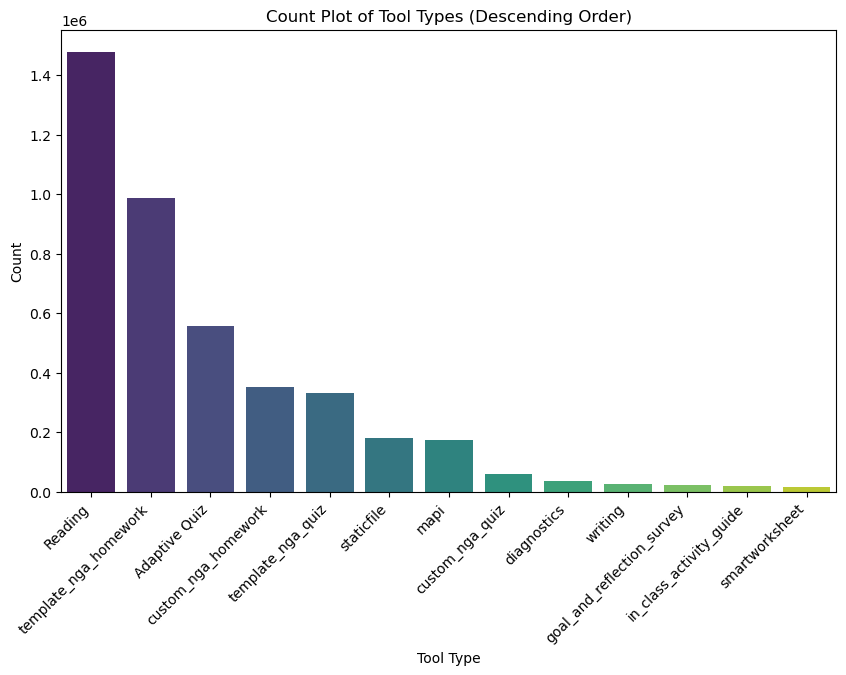

In [20]:
tool_type_counts = retention_df['ryan_tool_type'].value_counts()

# Sort the tool types based on counts in descending order
sorted_tool_types = tool_type_counts.index

# Plotting
plt.figure(figsize=(10, 6))
sns.countplot(x='ryan_tool_type', data=retention_df, order=sorted_tool_types, palette='viridis')
plt.xlabel('Tool Type')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.ylabel('Count')
plt.title('Count Plot of Tool Types (Descending Order)')
plt.show()

In [21]:
temp1 = retention_df[(retention_df['course_year'].isin(['2021'])) & (retention_df['course_term'].isin(['fall', 'winter']))]
temp22_fall = retention_df[(retention_df['course_year'].isin(['2022'])) & (retention_df['course_term'].isin(['fall']))]
temp22_spring = retention_df[(retention_df['course_year'].isin(['2022'])) & (retention_df['course_term'].isin(['spring']))]
temp22_rest = retention_df[(retention_df['course_year'].isin(['2022'])) & (retention_df['course_term'].isin(['summer','winter']))]
temp3 = retention_df[(retention_df['course_year'].isin(['2023'])) & (retention_df['course_term'].isin(['spring']))]

In [22]:
print(retention_df['course_year'].dtype)

object


In [24]:
#temp1.to_csv("2021.csv")
#temp22_fall.to_csv("2022_fall.csv")
#temp22_spring.to_csv("2022_spring.csv")
#temp22_rest.to_csv("2022_rest.csv")
#temp3.to_csv("2023.csv")

In [2]:
#temp1 = pd.read_csv("2021.csv")

/var/folders/bg/92qc2wfn1wd57tm7ktlqdbqw0000gq/T/ipykernel_2354/37893111.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  temp1 = pd.read_csv("2021.csv")


In [4]:
#temp22_fall = pd.read_csv("2022_fall.csv")

/var/folders/bg/92qc2wfn1wd57tm7ktlqdbqw0000gq/T/ipykernel_2354/1327081228.py:1: DtypeWarning: Columns (4,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  temp22_fall = pd.read_csv("2022_fall.csv")


In [5]:
#temp22_spring = pd.read_csv("2022_spring.csv")

/var/folders/bg/92qc2wfn1wd57tm7ktlqdbqw0000gq/T/ipykernel_2354/3868402714.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  temp22_spring = pd.read_csv("2022_spring.csv")


In [6]:
#temp22_rest = pd.read_csv("2022_rest.csv")

/var/folders/bg/92qc2wfn1wd57tm7ktlqdbqw0000gq/T/ipykernel_2354/2417100692.py:1: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  temp22_rest = pd.read_csv("2022_rest.csv")


In [7]:
#temp3 = pd.read_csv("2023.csv")

/var/folders/bg/92qc2wfn1wd57tm7ktlqdbqw0000gq/T/ipykernel_2354/357575554.py:1: DtypeWarning: Columns (4,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  temp3 = pd.read_csv("2023.csv")


In [8]:
#retention_df = pd.concat([temp1, temp22_fall, temp22_spring, temp22_rest, temp3], ignore_index=True)

In [23]:
temp1.head()

,course_id,course_term,course_year,isbn,isbn_title,template_version,template_key_id,template_course_term_taught_key,assignment_id,latest_template_assignment_id,...,student_tot_sum_min,student_tot_count,sum_questions_presented,sum_attempts_on_items,course_student_count,instructor_cnt_who_launched,student_cnt_who_launched,instructor_terms_taught,ryan_tool_type,foundry_extract_ts
5,52db4584-747d-4b14-993d-539ffe3dc9b1,fall,2021,9781319337889,Achieve for College Physics (1-Term Online),7,9781319337889-7-617b769d-6ca3-443e-a94f-6393cd...,9781319337889-7-fall-2021-1,c2720f61-2a05-4364-8f85-12cbd5ff45b7,617b769d-6ca3-443e-a94f-6393cddb0375,...,NaN,NaN,NaN,NaN,195,1,0,1,in_class_activity_guide,2023-12-21 17:52:21
14,3dd02c77-0ab9-4c32-a7f5-eeb02fb6372c,fall,2021,9781319374693,Achieve for Ecology: The Economy of Nature (1-...,5,9781319374693-5-91bb5a2a-a6fb-4c50-94fd-33e588...,9781319374693-5-fall-2021-1,a9fabb0e-248a-4049-a16c-5c97798477c8,91bb5a2a-a6fb-4c50-94fd-33e5883ff819,...,NaN,NaN,NaN,NaN,19,1,0,1,in_class_activity_guide,2023-12-21 17:52:21
22,e977f7d0-f260-4979-a260-a97d0523dc9c,fall,2021,9781319333058,Achieve for A Writer's Reference (1-Term Online),2,9781319333058-2-49f1b6aa-9370-48ff-a432-f2be36...,9781319333058-2-fall-2021-2,aaee5a46-a552-4a33-9015-5276e6d8ee3a,49f1b6aa-9370-48ff-a432-f2be369705a7,...,NaN,NaN,NaN,NaN,18,1,0,2,in_class_activity_guide,2023-12-21 17:52:21
44,bf0e869d-84f1-4264-8b99-f82cfcd815a9,fall,2021,9781319218430,Achieve for Readers and Writers (1-Term Online...,11,9781319218430-11-1c18ce5e-fe8d-4d7e-88c0-7d806...,9781319218430-11-fall-2021-1,bcf0c7e5-4bf4-4566-bff1-df541d5e2958,1c18ce5e-fe8d-4d7e-88c0-7d806a1a20e2,...,NaN,NaN,NaN,NaN,17,0,0,1,in_class_activity_guide,2023-12-21 17:52:21
55,709d8683-1403-4e22-8a56-1fa686c6cd11,fall,2021,9781319329570,Achieve for Modern Principles: Macroeconomics ...,9,9781319329570-9-17ba6203-82df-4db1-b323-7736c8...,9781319329570-9-fall-2021-1,bd946790-0d05-4ed6-ac2c-d1e0b87a1847,17ba6203-82df-4db1-b323-7736c8c40291,...,NaN,NaN,NaN,NaN,285,0,1,1,in_class_activity_guide,2023-12-21 17:52:21


In [24]:
temp3.shape

(808565, 35)

In [26]:
retention_df['assignment_type'].nunique()

246

### Question
1. Should I filter on Student Activity as assignment type

In [27]:
course_areas = ['General Chemistry','Other Chemistry','Organic Chemistry','Intro Chemistry']

In [28]:
subject_group = course_areas[1]

In [ ]:
course_dim = pd.read_sql(f"select * from warehouse.course_dim limit 10", conn)

In [30]:
subject_groups = pd.read_sql(f"select distinct subject_group from warehouse.course_dim", conn)

/var/folders/bg/92qc2wfn1wd57tm7ktlqdbqw0000gq/T/ipykernel_2158/532181098.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  subject_groups = pd.read_sql(f"select distinct subject_group from warehouse.course_dim", conn)


In [31]:
subject_groups

,subject_group
0,Intermediate Macro
1,Introductory Psychology
2,Readers
3,Experimental Psychology
4,Abnormal & Clinical
5,Developmental Psychology
6,Literature
7,Organic Chemistry
8,Political Science
9,Other Communication


In [32]:
isbn_list = pd.DataFrame()

for subject_group in course_areas:
    isbn = pd.read_sql(f"SELECT DISTINCT subject_group, isbn, isbn_title FROM warehouse.course_dim WHERE subject_group='{subject_group}'", conn)
    isbn_list = pd.concat([isbn_list, isbn], ignore_index=True)

/var/folders/bg/92qc2wfn1wd57tm7ktlqdbqw0000gq/T/ipykernel_2158/1580088318.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  isbn = pd.read_sql(f"SELECT DISTINCT subject_group, isbn, isbn_title FROM warehouse.course_dim WHERE subject_group='{subject_group}'", conn)


In [33]:
isbn_list.head()

,subject_group,isbn,isbn_title
0,General Chemistry,9781319257835,Achieve for Interactive General Chemistry (1-T...
1,General Chemistry,9781319459512,Achieve for General Chemistry Simulations (5 L...
2,General Chemistry,9781319400286,"Achieve Essentials for Tro, Chemistry: A Molec..."
3,General Chemistry,9781319445317,Achieve for Interactive General Chemistry Atom...
4,General Chemistry,9781319470395,CM Achieve Essentials for OpenStax General Che...


In [34]:
isbn_list['subject_group'].value_counts()

subject_group
Other Chemistry      68
General Chemistry    66
Organic Chemistry    17
Intro Chemistry       8
Name: count, dtype: int64

In [ ]:
retention = pd.read_sql("SELECT * FROM business.course_retention WHERE year_number IN (2021, 2022, 2023)", conn)

/var/folders/bg/92qc2wfn1wd57tm7ktlqdbqw0000gq/T/ipykernel_2158/55220278.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  retention = pd.read_sql("SELECT * FROM business.course_retention WHERE year_number IN (2021, 2022, 2023)", conn)


In [ ]:
retention.head()

In [98]:
retention = retention[~retention['was_retained'].isna()]

In [99]:
content_analytics_df = pd.concat([temp1, temp22_fall, temp22_spring, temp22_rest, temp3], ignore_index=True)

In [100]:
content_analytics_df.head()

,course_id,course_term,course_year,isbn,isbn_title,template_version,template_key_id,template_course_term_taught_key,assignment_id,latest_template_assignment_id,...,student_tot_sum_min,student_tot_count,sum_questions_presented,sum_attempts_on_items,course_student_count,instructor_cnt_who_launched,student_cnt_who_launched,instructor_terms_taught,ryan_tool_type,foundry_extract_ts
0,06b00e3d-7e1c-4ae7-a70a-66113642bdaa,fall,2021,9781319333058,Achieve for A Writer's Reference (1-Term Online),3,9781319333058-3-028f9402-ed38-413c-9eb4-4bc368...,9781319333058-3-fall-2021-1,1aa307e5-1249-4aa9-967b-553ee84e1e57,028f9402-ed38-413c-9eb4-4bc3685d05dd,...,NaN,NaN,NaN,NaN,10,0,0,1,template_nga_homework,2023-12-18 21:57:35
1,a7d0c214-1932-4b10-a350-47aeb981f6fc,fall,2021,9781319331702,Achieve for Microeconomics: Canadian Edition (...,2,9781319331702-2-efff86a0-a7e2-4cb6-9f1b-649d07...,9781319331702-2-fall-2021-1,baa4332d-799f-4661-b3ea-f2eca7fa90f0,efff86a0-a7e2-4cb6-9f1b-649d078725c5,...,620.767234,12.0,202.0,264.0,55,0,12,1,template_nga_quiz,2023-12-18 21:57:35
2,de638492-d606-4b85-b486-04ba3b454c0e,fall,2021,9781319395056,Achieve for Statistics: Concepts and Controver...,4,9781319395056-4-330fd9ba-9daf-43d7-abb3-f04f35...,9781319395056-4-fall-2021-2,f98bcc71-94cb-463a-91bf-c9f45b0e3210,330fd9ba-9daf-43d7-abb3-f04f35d32876,...,1412.687203,25.0,409.0,488.0,27,0,25,2,template_nga_homework,2023-12-18 21:57:35
3,419f43f7-3377-4285-b37e-c5a83c71b6fa,fall,2021,9781319329778,Achieve for Modern Principles: Microeconomics ...,3,9781319329778-3-dcac6057-cde4-4a51-987f-4fd957...,9781319329778-3-fall-2021-3,1d33362e-9c56-4af7-aa14-e24564ea982b,dcac6057-cde4-4a51-987f-4fd9573efbaf,...,53.854496,1.0,10.0,15.0,26,0,1,3,template_nga_homework,2023-12-18 21:57:35
4,4b806f37-c2e9-46ae-b109-ad10051a3d95,fall,2021,9781319402846,Achieve for Biochemistry (1-Term Online),3,9781319402846-3-3a883f93-6bbc-4b77-98bf-e046a5...,9781319402846-3-fall-2021-1,6d932b7b-0ac8-4fa4-8691-92a5c4f7de1a,3a883f93-6bbc-4b77-98bf-e046a5331572,...,3210.356979,19.0,228.0,386.0,19,1,19,1,template_nga_homework,2023-12-18 21:57:35


In [101]:
content_analytics_df['course_id'].nunique()

36170

In [102]:
content_analytics_df['isbn_title'].value_counts()

isbn_title
Achieve for The Basic Practice of Statistics (1-Term Online)                                253105
Achieve for Statistics: Concepts and Controversies (1-Term Online)                          149418
Achieve for Life: The Science of Biology (1-Term Online)                                    123086
Achieve for What Is Life? A Guide to Biology with Physiology (1-Term Online)                113919
Achieve for Exploring Psychology (1-Term Online)                                             81919
                                                                                             ...  
Chemical Principles (International Edition; 2-Term/Twelve-Month Online)                          9
Achieve for Essentials of Economics (2-Term/Twelve-Months Online; International Edition)         7
HM Achieve Essentials for Chemistry 1202 (1-Term Online)                                         4
CM Achieve Essentials for Engaged Citizen (1-Term Online) for University of Oklahoma             2

In [103]:
sub_content_analytics_df = content_analytics_df[content_analytics_df['isbn'].isin(list(isbn_list.isbn))]

In [104]:
sub_content_analytics_df['isbn_title'].value_counts()

isbn_title
Achieve for Interactive General Chemistry (1-Term Online)                              51099
Achieve for Introductory Chemistry (1-Term Online)                                     44673
Achieve for Interactive General Chemistry Atoms First (1-Term Online)                  37569
Achieve Essentials for Organic Chemistry (1-Term Online)                               26405
Achieve Essentials for General Chemistry (1-Term Online)                               25833
                                                                                       ...  
HM Achieve for Chemistry for Engineers CHM 114 (1-Term Online)                            16
HM Achieve Essentials for CH201: Chemistry - A Quantitative Science (2-Term Online)       11
HM WILLO Achieve for Chemistry Laboratory Sims (1-Term Online)                            10
Chemical Principles (International Edition; 2-Term/Twelve-Month Online)                    9
HM Achieve Essentials for Chemistry 1202 (1-Term Online)   

In [105]:
course_assignement_usage = sub_content_analytics_df.pivot_table(index='course_id', columns='ryan_tool_type', values='isbn', aggfunc='count', fill_value=0)

In [106]:
course_assignement_usage

ryan_tool_type,Adaptive Quiz,Reading,custom_nga_homework,custom_nga_quiz,diagnostics,goal_and_reflection_survey,in_class_activity_guide,mapi,smartworksheet,staticfile,template_nga_homework,template_nga_quiz
course_id,,,,,,,,,,,,
0000deef-6ed2-46c2-9904-7a719cb21d94,0,0,24,0,0,0,0,0,0,0,5,0
00057b3d-c544-4d10-95a1-0a7bfd0bba89,15,1,0,0,0,0,0,0,0,0,19,0
000920b7-ba31-4e94-bbee-e753c9c2e03f,0,11,0,0,0,0,0,0,6,0,0,0
0009b97b-c272-416b-9e8b-2a406d4e8a2b,9,17,4,0,0,0,0,7,0,1,7,1
0011d134-c914-43fd-b24e-9fe45b813a84,6,0,0,0,0,0,0,0,0,12,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...
fff1cbe8-c04f-40c4-a6b3-aa1d28ea150a,16,0,9,0,0,0,0,0,0,0,4,0
fff62c40-6e79-4670-b1ff-000025dd10b6,0,17,7,0,0,2,0,0,0,0,24,0
fff65f3c-86c5-48b4-944b-9f78c9fd97e5,0,0,0,0,0,0,0,0,0,0,19,0


In [107]:
retention.set_index('course_id')

,was_retained,instructor_retained,px_retained,half_dt_order,year_number,half,foundry_extract_ts
course_id,,,,,,,
036f9b0b-273f-4699-991c-f39f0c8a6960,1.0,1,1.0,12,2022,2,2023-12-19 02:13:36
03705188-aaf6-4e4b-bc26-ba537f3d9a2c,1.0,1,1.0,10,2021,2,2023-12-19 02:13:36
043dc76b-af85-4473-a8e4-ec9f5baae35f,1.0,1,1.0,12,2022,2,2023-12-19 02:13:36
04560d9b-10ea-469e-998e-278432734826,1.0,1,1.0,12,2022,2,2023-12-19 02:13:36
046c6904-8825-4b6d-be5c-51a71130de0d,1.0,1,NaN,12,2022,2,2023-12-19 02:13:36
...,...,...,...,...,...,...,...
38816492-4cb7-4dca-b3a4-990afd7eabec,1.0,0,1.0,13,2023,1,2023-12-19 02:13:36
38825b30-1fd3-4709-8305-84a8469dbdf3,1.0,1,0.0,10,2021,2,2023-12-19 02:13:36
404f367d-d30f-4166-a239-93629e550ace,0.0,0,0.0,10,2021,2,2023-12-19 02:13:36


In [108]:
course_assignement_usage = pd.merge(course_assignement_usage, retention.set_index('course_id')[['was_retained']], right_index=True, left_index=True)

In [109]:
course_assignement_usage.reset_index(inplace=True)
course_assignement_usage = course_assignement_usage.rename(columns = {'index':'course_id'})

In [110]:
course_assignement_usage.columns

Index(['course_id', 'Adaptive Quiz', 'Reading', 'custom_nga_homework',
       'custom_nga_quiz', 'diagnostics', 'goal_and_reflection_survey',
       'in_class_activity_guide', 'mapi', 'smartworksheet', 'staticfile',
       'template_nga_homework', 'template_nga_quiz', 'was_retained'],
      dtype='object')

In [111]:
course_assignement_usage['course_id'].nunique()

9176

In [112]:
course_assignement_usage

,course_id,Adaptive Quiz,Reading,custom_nga_homework,custom_nga_quiz,diagnostics,goal_and_reflection_survey,in_class_activity_guide,mapi,smartworksheet,staticfile,template_nga_homework,template_nga_quiz,was_retained
0,0000deef-6ed2-46c2-9904-7a719cb21d94,0,0,24,0,0,0,0,0,0,0,5,0,1.0
1,00057b3d-c544-4d10-95a1-0a7bfd0bba89,15,1,0,0,0,0,0,0,0,0,19,0,1.0
2,000920b7-ba31-4e94-bbee-e753c9c2e03f,0,11,0,0,0,0,0,0,6,0,0,0,1.0
3,0009b97b-c272-416b-9e8b-2a406d4e8a2b,9,17,4,0,0,0,0,7,0,1,7,1,0.0
4,0011d134-c914-43fd-b24e-9fe45b813a84,6,0,0,0,0,0,0,0,0,12,9,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9171,fff1392d-3f12-41bf-9700-0bee340632f8,0,0,0,0,0,0,0,0,0,0,19,0,1.0
9172,fff62c40-6e79-4670-b1ff-000025dd10b6,0,17,7,0,0,2,0,0,0,0,24,0,0.0
9173,fff65f3c-86c5-48b4-944b-9f78c9fd97e5,0,0,0,0,0,0,0,0,0,0,19,0,1.0
9174,fff840dc-b922-45e1-9100-502707f0141b,8,4,0,0,0,0,0,0,0,0,15,0,1.0


In [113]:
course_assignement_usage.shape

(9176, 14)

/Users/shambhavi.kulkarni/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


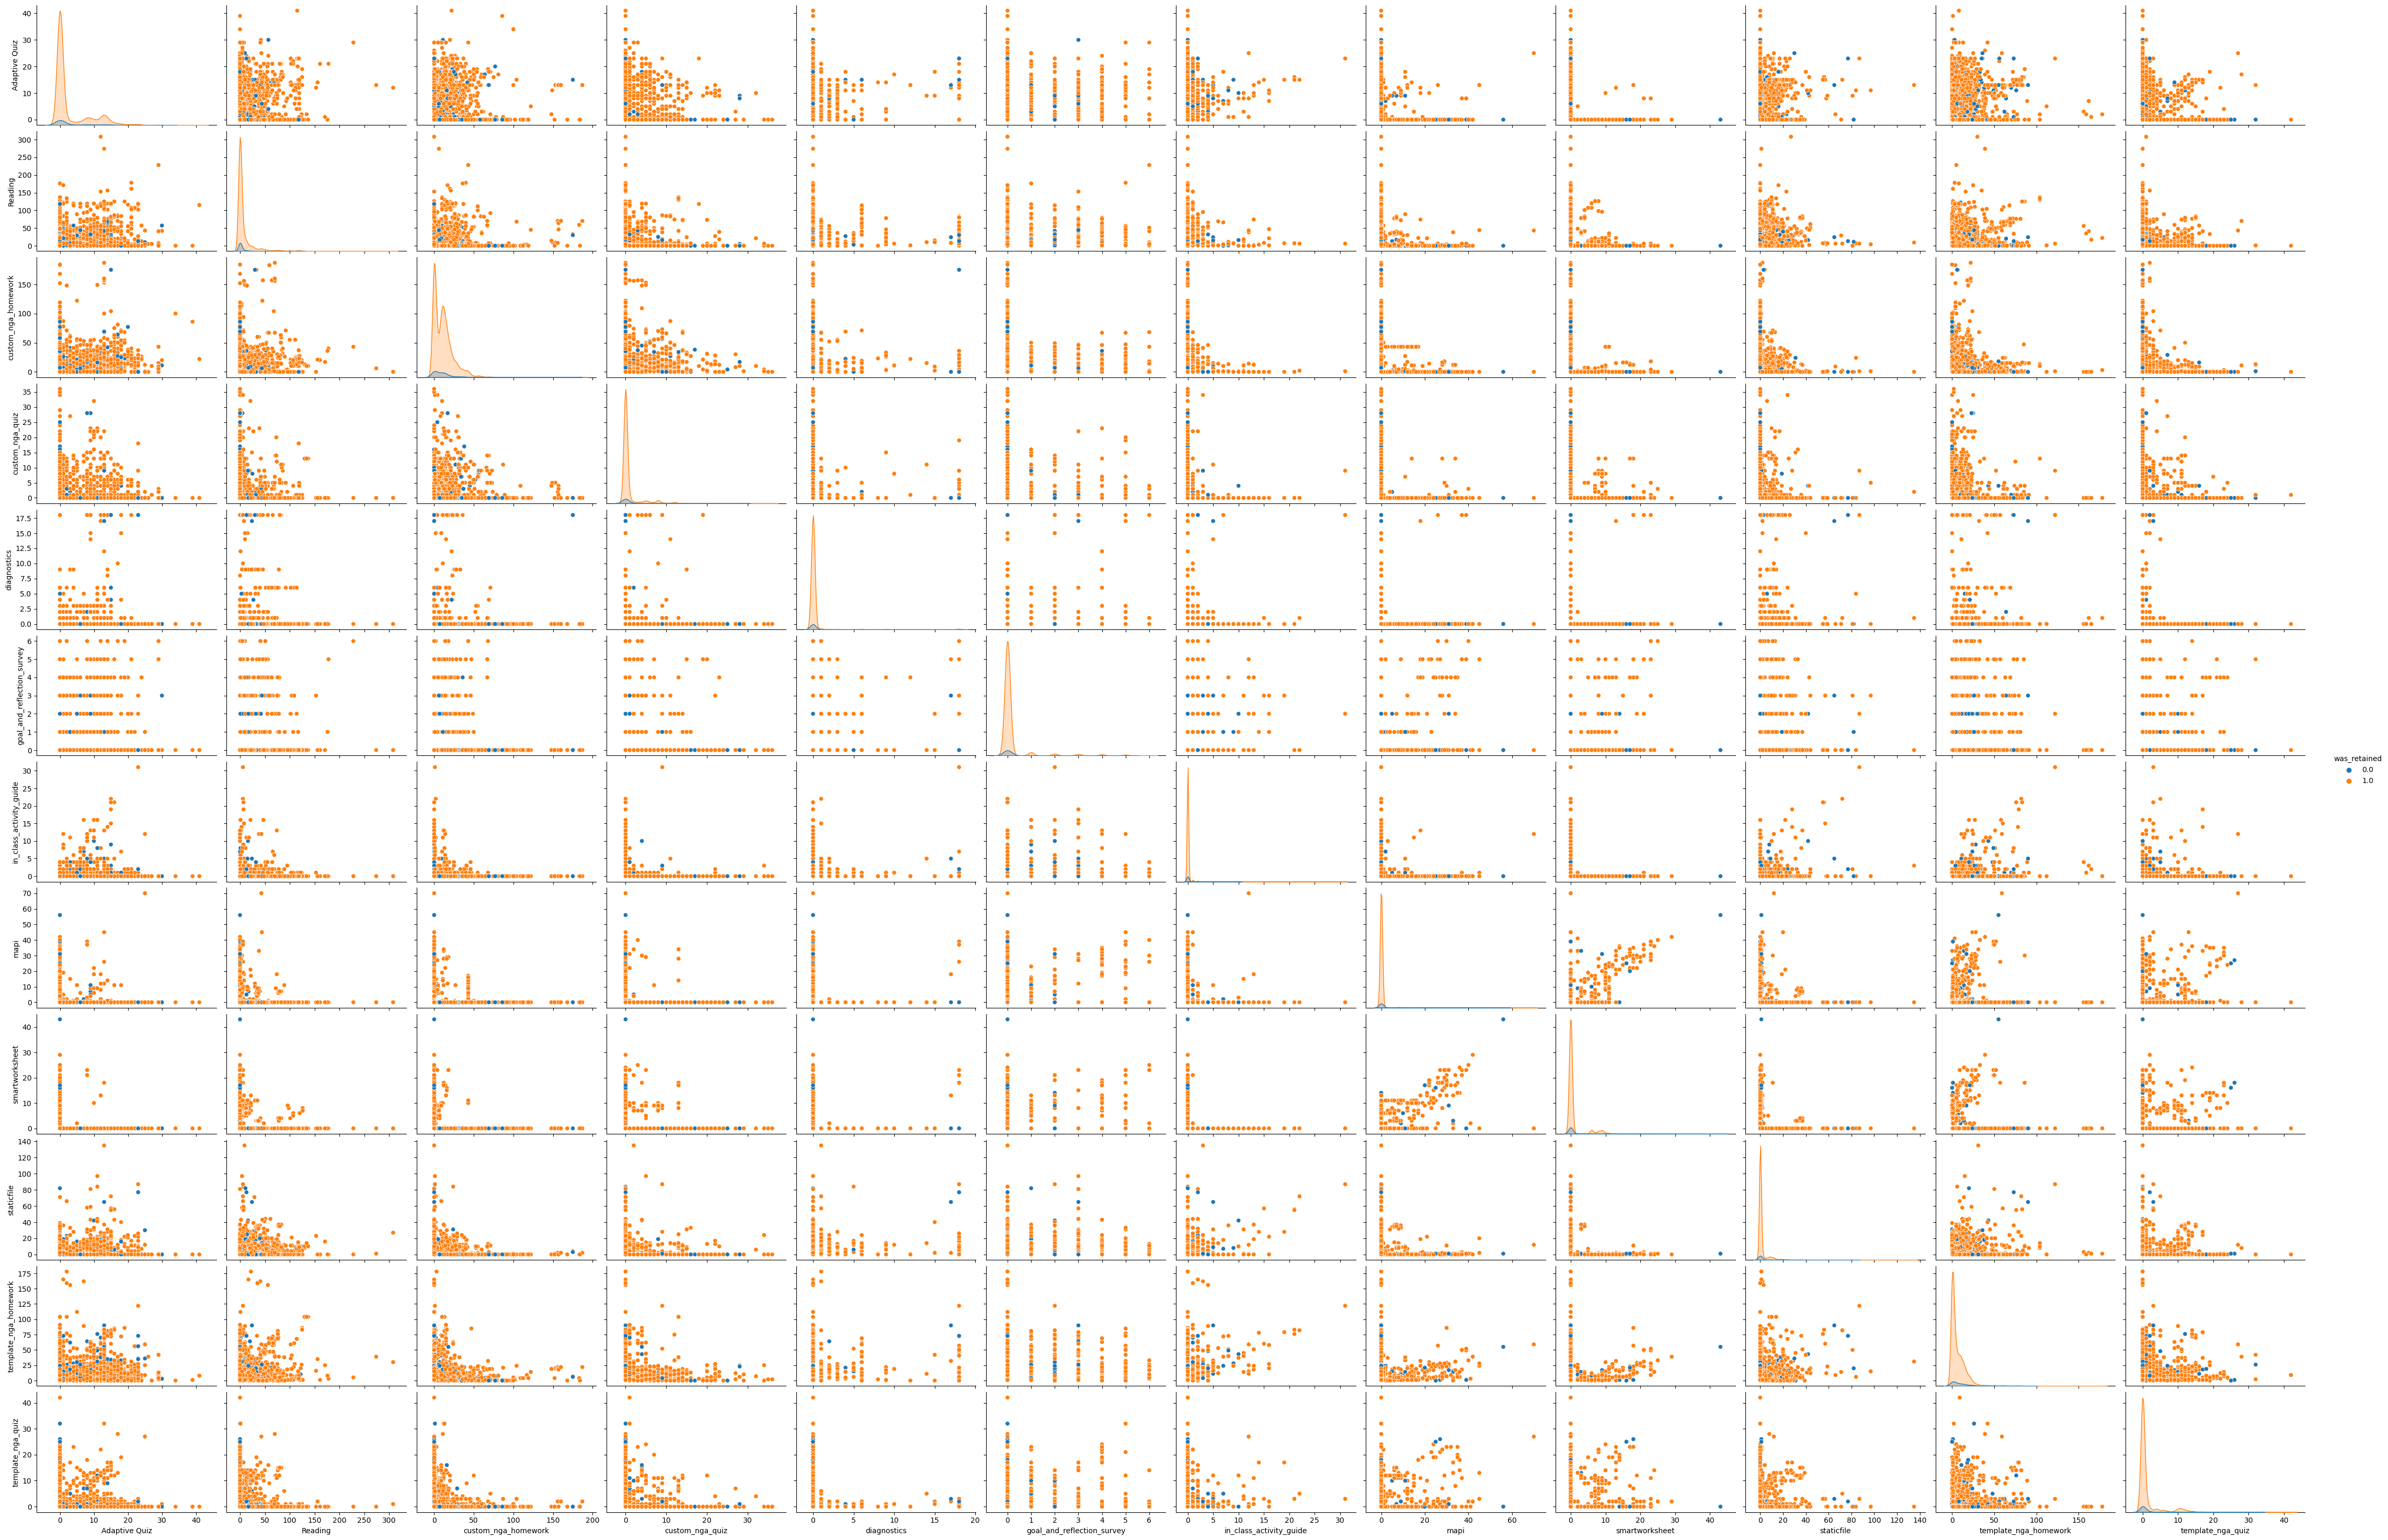

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
cluster_df = course_assignement_usage.drop(['course_id', 'was_retained'], axis=1)
sns.pairplot(course_assignement_usage.drop('course_id', axis=1), hue='was_retained', aspect=1.5)
plt.show()

In [36]:
course_assignement_usage.head()

,course_id,Adaptive Quiz,Reading,custom_nga_homework,custom_nga_quiz,diagnostics,goal_and_reflection_survey,in_class_activity_guide,mapi,smartworksheet,staticfile,template_nga_homework,template_nga_quiz,was_retained
0,0000deef-6ed2-46c2-9904-7a719cb21d94,0,0,24,0,0,0,0,0,0,0,5,0,1.0
1,00057b3d-c544-4d10-95a1-0a7bfd0bba89,15,1,0,0,0,0,0,0,0,0,19,0,1.0
2,000920b7-ba31-4e94-bbee-e753c9c2e03f,0,11,0,0,0,0,0,0,6,0,0,0,1.0
3,0009b97b-c272-416b-9e8b-2a406d4e8a2b,9,17,4,0,0,0,0,7,0,1,7,1,0.0
4,0011d134-c914-43fd-b24e-9fe45b813a84,6,0,0,0,0,0,0,0,0,12,9,0,1.0


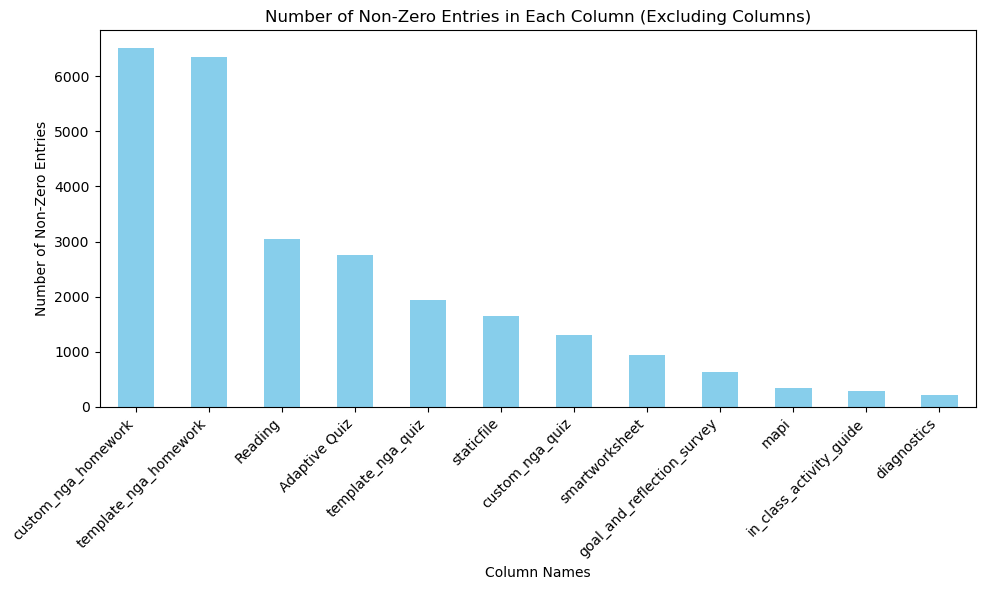

In [53]:
columns_to_exclude = ['course_id', 'was_retained']

# Count non-zero entries in each column, excluding specified columns
non_zero_counts = course_assignement_usage.drop(columns=columns_to_exclude).astype(bool).sum(axis=0)

# Filter out columns with zero counts
non_zero_columns = non_zero_counts[non_zero_counts != 0]

# Sort columns by count in descending order
sorted_columns = non_zero_columns.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sorted_columns.plot(kind='bar', color='skyblue')
plt.xlabel('Column Names')
plt.ylabel('Number of Non-Zero Entries')
plt.title('Number of Non-Zero Entries in Each Column (Excluding Columns)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


According to the hypothesis
Level1 - 93.7% retention (2785)
Level2 - 99.1% retention (114)
Level3 - 93.5% retention (31)

In [37]:
columns_of_interest = [
    'custom_nga_homework',
    'custom_nga_quiz',
    'template_nga_homework',
    'template_nga_quiz'
]

df1 = course_assignement_usage[columns_of_interest]
row_sums = df1.sum(axis=1)
threshold = 0.6 * df1.shape[1]
common_cond_df = course_assignement_usage[row_sums >= threshold]

In [38]:
selected_columns = ['custom_nga_homework', 'custom_nga_quiz', 'template_nga_homework', 'template_nga_quiz']

# Define the percentage of non-zero values you want (60% in this case)
percentage_non_zero = 0.6

# List to store valid rows
valid_rows = []

# Iterate through rows and enforce the condition
for index, row in course_assignement_usage.iterrows():
    # Check if the percentage of non-zero values in the selected columns is at least 60%
    if row[selected_columns].astype(bool).sum() / len(selected_columns) >= percentage_non_zero:
        # Append the row to the list of valid rows
        valid_rows.append(row.tolist())

# Create a new DataFrame from the list of valid rows
new_df = pd.DataFrame(valid_rows, columns=course_assignement_usage.columns)

In [39]:
new_df.shape

(2785, 14)

In [40]:
level1_chemistry = new_df[(course_assignement_usage['Reading'] == 0) &
                                    (course_assignement_usage['diagnostics'] == 0) & 
                                    (course_assignement_usage['mapi'] == 0) &
                                    (course_assignement_usage['Adaptive Quiz'] == 0) & 
                                    (course_assignement_usage['goal_and_reflection_survey'] == 0)]

/var/folders/bg/92qc2wfn1wd57tm7ktlqdbqw0000gq/T/ipykernel_2083/2897628977.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  level1_chemistry = new_df[(course_assignement_usage['diagnostics'] == 0) &


In [41]:
level1_chemistry.shape

(2460, 14)

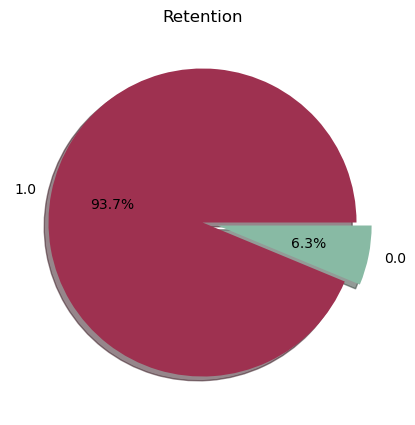

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
ax = level1_chemistry['was_retained'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', shadow=True, colors = ['#9e3150', '#88baa4'])
ax.set_title('Retention')
plt.ylabel('')
plt.show()

In [121]:
level22_chemistry = new_df[new_df['mapi'] != 0]

In [122]:
level2_chemistry = level22_chemistry[(level22_chemistry['diagnostics'] == 0) & 
                                (level22_chemistry['goal_and_reflection_survey'] == 0)]

In [123]:
level2_chemistry.shape

(337, 14)

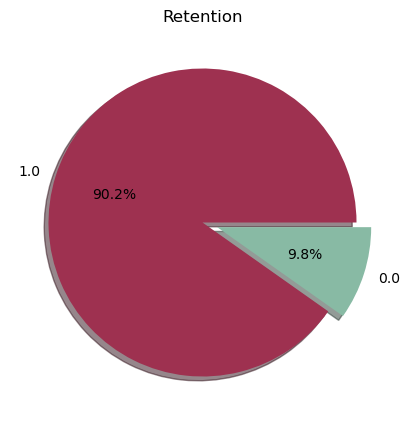

In [125]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
ax = level2_chemistry['was_retained'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', shadow=True, colors = ['#9e3150', '#88baa4'])
ax.set_title('Retention')
plt.ylabel('')
plt.show()

In [48]:
columns_for_condition = ['diagnostics', 'goal_and_reflection_survey']
df2 = level22_chemistry[columns_for_condition]

row_sums = df2.sum(axis=1)

threshold = 1

level3_chemistry = level22_chemistry[row_sums >= threshold]

In [49]:
level3_chemistry.shape

(31, 14)

In [50]:
level3_chemistry['was_retained'].value_counts()

was_retained
1.0    29
0.0     2
Name: count, dtype: int64

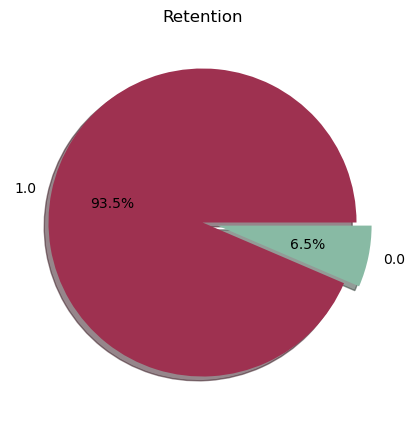

In [51]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
ax = level3_chemistry['was_retained'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', shadow=True, colors = ['#9e3150', '#88baa4'])
ax.set_title('Retention')
plt.ylabel('')
plt.show()

/Users/shambhavi.kulkarni/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/shambhavi.kulkarni/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/shambhavi.kulkarni/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/shambhavi.kulkarni/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarni

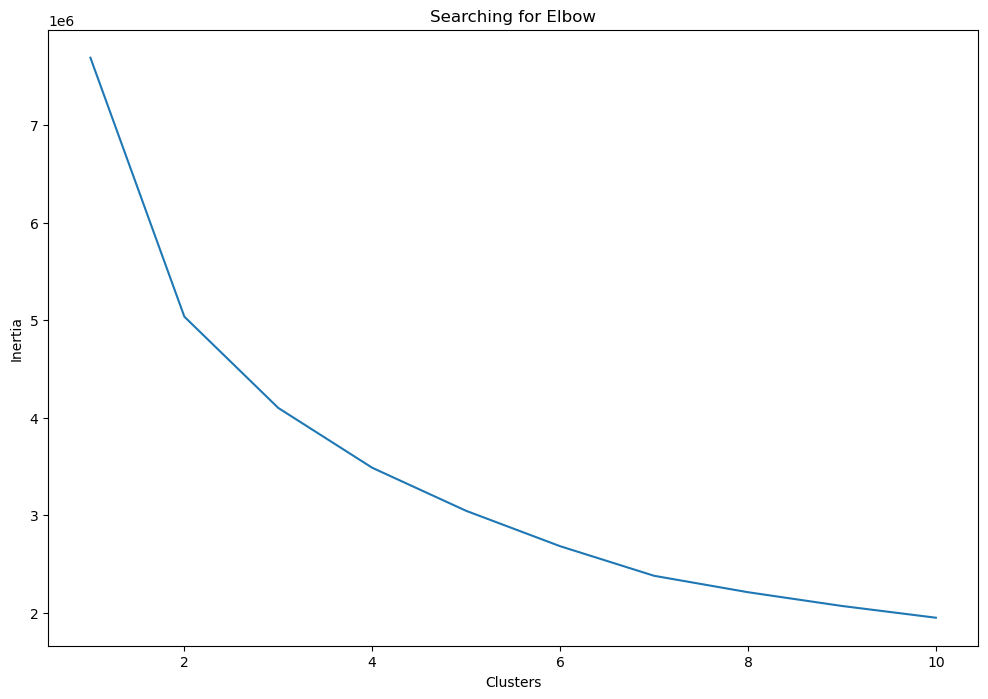

In [141]:
from sklearn.cluster import KMeans

clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(cluster_df)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# Annotate arrow
ax.annotate('Possible Elbow Point', xy=(3, 140000), xytext=(3, 50000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

ax.annotate('Possible Elbow Point', xy=(5, 80000), xytext=(5, 150000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.show()

In [ ]:
km3 = KMeans(n_clusters=4).fit(cluster_df)

cluster_df['Labels'] = km3.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(cluster_df['Income'], cluster_df['Score'], hue=cluster_df['Labels'], 
                palette=sns.color_palette('hls', 3))
plt.title('KMeans with 3 Clusters')
plt.show()

In [9]:
retention_df.columns

Index(['course_id', 'course_term', 'course_year', 'isbn', 'isbn_title',
       'template_version', 'template_key_id',
       'template_course_term_taught_key', 'assignment_id',
       'latest_template_assignment_id', 'activity_id', 'tool',
       'is_template_activity', 'is_prebuilt', 'assignment_due_at',
       'visibility_available_date', 'learning_path',
       'template_sub_folder_name', 'template_folder_name',
       'template_assignment_name', 'chapter', 'assignment_type',
       'student_with_grades', 'grade_sum', 'assigned_points',
       'student_tot_sum_min', 'student_tot_count', 'sum_questions_presented',
       'sum_attempts_on_items', 'course_student_count',
       'instructor_cnt_who_launched', 'student_cnt_who_launched',
       'instructor_terms_taught', 'ryan_tool_type', 'foundry_extract_ts'],
      dtype='object')

In [10]:
retention_df.shape

(5250711, 35)

In [11]:
num_duplicates = retention_df.duplicated().sum()

print("Number of Duplicate Rows:", num_duplicates)

Number of Duplicate Rows: 0


In [12]:
retention_df['course_year'].value_counts()

course_year
2023    2361570
2022    1717418
2021     971160
2020     196179
2024       4384
Name: count, dtype: int64

In [13]:
retention_df['ryan_tool_type'].value_counts()

ryan_tool_type
Reading                       1476871
template_nga_homework          986148
Adaptive Quiz                  556811
custom_nga_homework            352683
template_nga_quiz              331606
staticfile                     179144
mapi                           173463
custom_nga_quiz                 60716
diagnostics                     35141
writing                         26689
goal_and_reflection_survey      23658
in_class_activity_guide         20526
smartworksheet                  16891
Name: count, dtype: int64

In [43]:
#subset_df = retention_df.iloc[:5000]

In [44]:
#subset_df.to_csv("output.csv")

In [14]:
def examine_data_quality(df):
    # Examine data quality
    print('{:<80}  {:<10}  {:<10}  {:<10}'.format('Column', 'N unique', 'Amt null', 'dtype'))
    print('-'*110)
    for column in df.columns:
        print('{:<80}  {:<10}  {:<10}  {:<10}'.format(column, df[column].nunique(), sum(df[column].isna()), str(df[column].dtype)))

In [15]:
examine_data_quality(retention_df)

Column                                                                            N unique    Amt null    dtype     
--------------------------------------------------------------------------------------------------------------
course_id                                                                         58207       0           object    
course_term                                                                       4           0           object    
course_year                                                                       5           0           object    
isbn                                                                              629         0           object    
isbn_title                                                                        563         538         object    
template_version                                                                  22          0           int64     
template_key_id                                                       

In [16]:
columns_to_drop = ['isbn', 'assignment_due_at', 'visibility_available_date', 'template_sub_folder_name',
                  'template_folder_name', 'chapter', 'foundry_extract_ts']

retention_df = retention_df.drop(columns = columns_to_drop)

In [17]:
retention_df.head()

,course_id,course_term,course_year,isbn_title,template_version,template_key_id,template_course_term_taught_key,assignment_id,latest_template_assignment_id,activity_id,...,assigned_points,student_tot_sum_min,student_tot_count,sum_questions_presented,sum_attempts_on_items,course_student_count,instructor_cnt_who_launched,student_cnt_who_launched,instructor_terms_taught,ryan_tool_type
0,9d1f687b-5b5a-4de0-9f75-b18ca743c6ab,spring,2022,Achieve for Organic Chemistry (1-Term Online),2,None,9781319335878-2-spring-2022-1,be77627e-431c-4aa6-b752-e637a3e729a9,None,5349072,...,17.0,15203.743540,76.0,1196.0,2517.0,111,1,80,1,custom_nga_homework
1,8053094f-b35e-49de-9222-bc3a52e36e2b,fall,2023,Achieve for Modern Principles: Microeconomics ...,7,9781319329778-7-35dd661f-b602-4c55-bb60-8b9fa0...,9781319329778-7-fall-2023-4,edb1bbed-22f2-4219-9165-40d8f6eabe11,35dd661f-b602-4c55-bb60-8b9fa0d22a1a,35dd661f-b602-4c55-bb60-8b9fa0d22a1a,...,NaN,NaN,NaN,NaN,NaN,20,0,1,4,template_nga_quiz
2,afd49676-3d9f-445f-b21b-a9a252148d91,spring,2022,Achieve for Life: The Science of Biology (1-Te...,2,9781319364984-2-28692f0a-e849-4a28-a921-7fa88f...,9781319364984-2-spring-2022-5,2b7709ec-8b2b-4dba-8558-618fda81ab21,28692f0a-e849-4a28-a921-7fa88f1e35f1,28692f0a-e849-4a28-a921-7fa88f1e35f1,...,4.0,45.133333,9.0,36.0,47.0,18,0,10,5,template_nga_quiz
3,7596154d-705d-49b6-889a-9dece5217a4f,fall,2020,Achieve Writer's Help for Hacker (1-Term Onlin...,1,9781319131340-1-03b73d1c-f2cf-4848-9269-6ca57f...,9781319131340-1-fall-2020-2,1d777db0-1e2d-4fce-9e2a-035aa0d38efd,03b73d1c-f2cf-4848-9269-6ca57f41b9cd,03b73d1c-f2cf-4848-9269-6ca57f41b9cd,...,NaN,NaN,NaN,NaN,NaN,21,0,0,2,template_nga_homework
4,fe36a5cc-1a4f-4f0d-b44c-4ea42c3a9ae5,fall,2023,Achieve for Introducing Psychology (1-Term Onl...,5,9781319467555-5-b0a38f18-6eaf-4a87-8fcd-f3c5fd...,9781319467555-5-fall-2023-3,bbc06b9d-c86a-4ec4-8d4a-c08bfa8849f5,b0a38f18-6eaf-4a87-8fcd-f3c5fdcee088,b0a38f18-6eaf-4a87-8fcd-f3c5fdcee088,...,NaN,NaN,NaN,NaN,NaN,76,0,1,3,template_nga_homework


In [17]:
#subset_df = retention_df.iloc[:5000]
#subset_df.to_csv("output.csv")

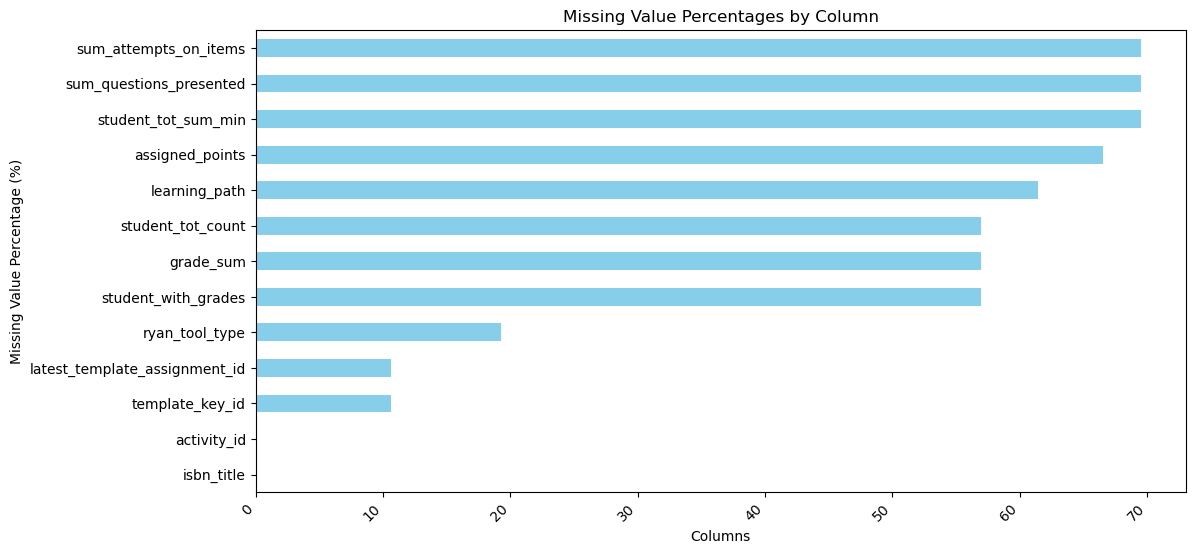

In [18]:
import matplotlib.pyplot as plt

# Calculate missing value percentages for each column
missing_percentages = (retention_df.isnull().mean() * 100).round(2)

missing_percentages = missing_percentages[missing_percentages > 0]

missing_percentages = missing_percentages.sort_values()

# Create a bar chart
plt.figure(figsize=(12, 6))
missing_percentages.plot(kind='barh', color='skyblue')
plt.title('Missing Value Percentages by Column')
plt.xlabel('Columns')
plt.ylabel('Missing Value Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.show()

In [19]:
columns_to_drop = ['sum_attempts_on_items', 'sum_questions_presented','student_tot_sum_min','assigned_points']

df = retention_df.drop(columns = columns_to_drop)

In [20]:
df.columns

Index(['course_id', 'course_term', 'course_year', 'isbn_title',
       'template_version', 'template_key_id',
       'template_course_term_taught_key', 'assignment_id',
       'latest_template_assignment_id', 'activity_id', 'tool',
       'is_template_activity', 'is_prebuilt', 'learning_path',
       'template_assignment_name', 'assignment_type', 'student_with_grades',
       'grade_sum', 'student_tot_count', 'course_student_count',
       'instructor_cnt_who_launched', 'student_cnt_who_launched',
       'instructor_terms_taught', 'ryan_tool_type'],
      dtype='object')

In [21]:
df = df[df['course_id'] == '756e8270-adbe-472f-96c8-55e0bcaf2528']

In [22]:
df.head()

,course_id,course_term,course_year,isbn_title,template_version,template_key_id,template_course_term_taught_key,assignment_id,latest_template_assignment_id,activity_id,...,template_assignment_name,assignment_type,student_with_grades,grade_sum,student_tot_count,course_student_count,instructor_cnt_who_launched,student_cnt_who_launched,instructor_terms_taught,ryan_tool_type
17970,756e8270-adbe-472f-96c8-55e0bcaf2528,fall,2023,CM Achieve for Readers and Writers 2e 2023 wit...,4,9781319532000-4-34930ba3-7ad7-4d09-a9d7-2c046d...,9781319532000-4-fall-2023-9,23e752ac-3417-466b-8086-60206b99d2d4,34930ba3-7ad7-4d09-a9d7-2c046d5070a3,34930ba3-7ad7-4d09-a9d7-2c046d5070a3,...,"Quiz: Kaminer, ""The War on High Schools""",template assessment,NaN,NaN,NaN,6,0,0,9,template_nga_quiz
44742,756e8270-adbe-472f-96c8-55e0bcaf2528,fall,2023,CM Achieve for Readers and Writers 2e 2023 wit...,4,9781319532000-4-91bcdea2-efa1-4930-82bd-fe832b...,9781319532000-4-fall-2023-9,0f206c4d-9359-48ed-94b4-88bfc170828f,91bcdea2-efa1-4930-82bd-fe832b8128f9,91bcdea2-efa1-4930-82bd-fe832b8128f9,...,Self-review: Active Reading,template assessment,NaN,NaN,NaN,6,0,0,9,template_nga_homework
47835,756e8270-adbe-472f-96c8-55e0bcaf2528,fall,2023,CM Achieve for Readers and Writers 2e 2023 wit...,4,9781319532000-4-748df7e1-0da4-4f93-a156-5ec88b...,9781319532000-4-fall-2023-9,f3d6e19d-6830-4c5d-8b86-55c1da14e64f,748df7e1-0da4-4f93-a156-5ec88bd05cf6,748df7e1-0da4-4f93-a156-5ec88bd05cf6,...,"Quiz: Soto, ""The Grandfather""",template assessment,NaN,NaN,NaN,6,0,0,9,template_nga_quiz
56216,756e8270-adbe-472f-96c8-55e0bcaf2528,fall,2023,CM Achieve for Readers and Writers 2e 2023 wit...,4,9781319532000-4-3e96bb32-c373-478e-bfd8-e268c5...,9781319532000-4-fall-2023-9,b0ee360a-b1a7-4049-b944-bda100bd551e,3e96bb32-c373-478e-bfd8-e268c5e31ecd,3e96bb32-c373-478e-bfd8-e268c5e31ecd,...,Self-check: Reading Critically,template assessment,NaN,NaN,NaN,6,0,0,9,template_nga_homework
73955,756e8270-adbe-472f-96c8-55e0bcaf2528,fall,2023,CM Achieve for Readers and Writers 2e 2023 wit...,4,9781319532000-4-32fc4889-5fee-4e4d-81b9-9e1d4d...,9781319532000-4-fall-2023-9,b43acd7f-caf5-47fe-bc48-4f636e3de4a4,32fc4889-5fee-4e4d-81b9-9e1d4d689ee4,32fc4889-5fee-4e4d-81b9-9e1d4d689ee4,...,Self-review: Commonly Confused Words,template assessment,NaN,NaN,NaN,6,0,0,9,template_nga_homework


In [23]:
num_duplicates = df.duplicated().sum()

print("Number of Duplicate Rows:", num_duplicates)

Number of Duplicate Rows: 0


In [24]:
columns_to_drop = ['template_key_id', 'assignment_id', 'latest_template_assignment_id', 'activity_id',
                  'template_assignment_name', 'student_with_grades', 'grade_sum', 'student_tot_count']

df.drop(columns = columns_to_drop, inplace=True)

In [25]:
df.head(10)

,course_id,course_term,course_year,isbn_title,template_version,template_course_term_taught_key,tool,is_template_activity,is_prebuilt,learning_path,assignment_type,course_student_count,instructor_cnt_who_launched,student_cnt_who_launched,instructor_terms_taught,ryan_tool_type
17970,756e8270-adbe-472f-96c8-55e0bcaf2528,fall,2023,CM Achieve for Readers and Writers 2e 2023 wit...,4,9781319532000-4-fall-2023-9,assessment,True,True,None,template assessment,6,0,0,9,template_nga_quiz
44742,756e8270-adbe-472f-96c8-55e0bcaf2528,fall,2023,CM Achieve for Readers and Writers 2e 2023 wit...,4,9781319532000-4-fall-2023-9,assessment,True,True,None,template assessment,6,0,0,9,template_nga_homework
47835,756e8270-adbe-472f-96c8-55e0bcaf2528,fall,2023,CM Achieve for Readers and Writers 2e 2023 wit...,4,9781319532000-4-fall-2023-9,assessment,True,True,None,template assessment,6,0,0,9,template_nga_quiz
56216,756e8270-adbe-472f-96c8-55e0bcaf2528,fall,2023,CM Achieve for Readers and Writers 2e 2023 wit...,4,9781319532000-4-fall-2023-9,assessment,True,True,None,template assessment,6,0,0,9,template_nga_homework
73955,756e8270-adbe-472f-96c8-55e0bcaf2528,fall,2023,CM Achieve for Readers and Writers 2e 2023 wit...,4,9781319532000-4-fall-2023-9,assessment,True,True,None,template assessment,6,0,0,9,template_nga_homework
92684,756e8270-adbe-472f-96c8-55e0bcaf2528,fall,2023,CM Achieve for Readers and Writers 2e 2023 wit...,4,9781319532000-4-fall-2023-9,assessment,True,True,None,template assessment,6,0,0,9,template_nga_homework
101876,756e8270-adbe-472f-96c8-55e0bcaf2528,fall,2023,CM Achieve for Readers and Writers 2e 2023 wit...,4,9781319532000-4-fall-2023-9,assessment,True,True,None,template assessment,6,0,0,9,template_nga_homework
104645,756e8270-adbe-472f-96c8-55e0bcaf2528,fall,2023,CM Achieve for Readers and Writers 2e 2023 wit...,4,9781319532000-4-fall-2023-9,assessment,True,True,None,template assessment,6,0,0,9,template_nga_quiz
110299,756e8270-adbe-472f-96c8-55e0bcaf2528,fall,2023,CM Achieve for Readers and Writers 2e 2023 wit...,4,9781319532000-4-fall-2023-9,assessment,True,True,None,template assessment,6,0,0,9,template_nga_homework
116379,756e8270-adbe-472f-96c8-55e0bcaf2528,fall,2023,CM Achieve for Readers and Writers 2e 2023 wit...,4,9781319532000-4-fall-2023-9,assessment,True,True,None,template assessment,6,0,0,9,template_nga_homework


In [29]:
#df.to_csv("temp.csv")

In [26]:
df.shape

(603, 16)

In [27]:
exclude_columns = ['sum_attempts_on_items', 'sum_questions_presented','student_tot_sum_min','assigned_points',
                  'template_key_id', 'assignment_id', 'latest_template_assignment_id', 'activity_id',
                  'template_assignment_name', 'student_with_grades', 'grade_sum', 'student_tot_count']

df1 = retention_df.drop(columns = exclude_columns)

In [28]:
num_duplicates = df1.duplicated().sum()

print("Number of Duplicate Rows:", num_duplicates)

Number of Duplicate Rows: 3690567


In [29]:
df_unique = df1.drop_duplicates()
#df_unique.reset_index(drop=True, inplace=True)

In [30]:
df_unique.shape

(1560144, 16)

In [31]:
df_unique.head()

,course_id,course_term,course_year,isbn_title,template_version,template_course_term_taught_key,tool,is_template_activity,is_prebuilt,learning_path,assignment_type,course_student_count,instructor_cnt_who_launched,student_cnt_who_launched,instructor_terms_taught,ryan_tool_type
0,9d1f687b-5b5a-4de0-9f75-b18ca743c6ab,spring,2022,Achieve for Organic Chemistry (1-Term Online),2,9781319335878-2-spring-2022-1,assessment,False,False,None,custom assessment,111,1,80,1,custom_nga_homework
1,8053094f-b35e-49de-9222-bc3a52e36e2b,fall,2023,Achieve for Modern Principles: Microeconomics ...,7,9781319329778-7-fall-2023-4,assessment,True,True,pre-class,Bridge,20,0,1,4,template_nga_quiz
2,afd49676-3d9f-445f-b21b-a9a252148d91,spring,2022,Achieve for Life: The Science of Biology (1-Te...,2,9781319364984-2-spring-2022-5,assessment,True,True,pre-class,Animation Quiz,18,0,10,5,template_nga_quiz
3,7596154d-705d-49b6-889a-9dece5217a4f,fall,2020,Achieve Writer's Help for Hacker (1-Term Onlin...,1,9781319131340-1-fall-2020-2,assessment,True,True,None,template assessment,21,0,0,2,template_nga_homework
4,fe36a5cc-1a4f-4f0d-b44c-4ea42c3a9ae5,fall,2023,Achieve for Introducing Psychology (1-Term Onl...,5,9781319467555-5-fall-2023-3,assessment,True,True,post-class,Concept Practice,76,0,1,3,template_nga_homework


In [32]:
examine_data_quality(df_unique)

Column                                                                            N unique    Amt null    dtype     
--------------------------------------------------------------------------------------------------------------
course_id                                                                         58207       0           object    
course_term                                                                       4           0           object    
course_year                                                                       5           0           object    
isbn_title                                                                        563         238         object    
template_version                                                                  22          0           int64     
template_course_term_taught_key                                                   14216       0           object    
tool                                                                  

In [43]:
missing_tool_type_df = df_unique[df_unique['ryan_tool_type'].isnull()]

In [45]:
missing_tool_type_df.shape

(84476, 15)

In [46]:
missing_tool_type_df.to_csv("temp.csv")

In [33]:
missing_isbn_df = df_unique[df_unique['isbn_title'].isnull()]

In [34]:
missing_isbn_df.shape

(238, 16)

In [35]:
missing_isbn_df.to_csv("temp.csv")

In [36]:
missing_isbn_df['course_id'].value_counts()

course_id
c37f0ac3-833b-4fa1-88a5-cdc971b08d7a    35
c595d68f-de7a-418f-82bf-4ad943c24285    27
4d3cbaea-39a2-48d1-8bd8-28bfbc84cd19    21
f2817063-aefa-4555-9e3d-ca03afda9fb5    14
eacfaa0f-54e7-41d2-bca6-c24b9d11ce9f    11
75acdff6-633c-45cb-8890-5c529efcb4b2    11
eb129e6a-f41e-40f4-8ca1-105aef27472d     9
a84138c9-2d9c-4e23-846e-1f3f2c9dfec7     7
3e4b4c84-045c-4c70-bcb5-b0a56e50a981     6
5fb98e0e-e1d7-4e1e-82d3-d501214ab798     6
174e38fc-585e-4328-8382-eaeb17565af7     6
2d1d585f-6a59-421e-9dfd-deed1bdb4a32     6
a461486f-f6db-40de-9308-442a1c6c8e3d     6
367df72e-6654-4170-9aaa-bd29b73478fb     5
17a4bcc3-aa4b-45c5-8965-a70157406eba     5
a9c53585-7818-4c26-8274-4b549e67a1f4     5
3718c4fa-fc92-4131-8d93-cbe58e5d5d5e     4
4338a2c8-8b0c-49fa-b997-0fd97b983e68     4
8750c070-92cc-4e1f-ba00-1abba6cf6223     4
a115c593-6065-4bd1-8f50-4335f251ef04     4
cfd98c32-2580-4346-a418-6fee205f10c9     3
db846f08-7ad9-427b-b58d-2fdc9d182bca     3
9ea39e60-1fa9-4986-9a58-8836b06a2256     3
b

In [38]:
df_unique[df_unique['course_id'] == 'c595d68f-de7a-418f-82bf-4ad943c24285']

,course_id,course_term,course_year,isbn_title,template_version,template_course_term_taught_key,tool,is_template_activity,is_prebuilt,learning_path,assignment_type,course_student_count,instructor_cnt_who_launched,student_cnt_who_launched,instructor_terms_taught,ryan_tool_type
62556,c595d68f-de7a-418f-82bf-4ad943c24285,spring,2021,None,1,DVSDFVFSVBSDF-1-spring-2021-1,assessment,False,False,None,custom assessment,5,2,1,1,custom_nga_quiz
79792,c595d68f-de7a-418f-82bf-4ad943c24285,spring,2021,None,1,DVSDFVFSVBSDF-1-spring-2021-1,assessment,False,False,None,custom assessment,5,2,1,1,custom_nga_homework
93836,c595d68f-de7a-418f-82bf-4ad943c24285,spring,2021,None,1,DVSDFVFSVBSDF-1-spring-2021-1,assessment,False,False,None,custom assessment,5,2,0,1,custom_nga_homework
170971,c595d68f-de7a-418f-82bf-4ad943c24285,spring,2021,None,1,DVSDFVFSVBSDF-1-spring-2021-1,assessment,False,False,None,custom assessment,5,3,1,1,custom_nga_quiz
175782,c595d68f-de7a-418f-82bf-4ad943c24285,spring,2021,None,1,DVSDFVFSVBSDF-1-spring-2021-1,assessment,False,False,None,custom assessment,5,3,2,1,custom_nga_homework
207368,c595d68f-de7a-418f-82bf-4ad943c24285,spring,2021,None,1,DVSDFVFSVBSDF-1-spring-2021-1,assessment,False,False,None,custom assessment,5,3,1,1,custom_nga_homework
264882,c595d68f-de7a-418f-82bf-4ad943c24285,spring,2021,None,1,DVSDFVFSVBSDF-1-spring-2021-1,assessment,False,False,None,custom assessment,5,3,0,1,custom_nga_homework
302934,c595d68f-de7a-418f-82bf-4ad943c24285,spring,2021,None,1,DVSDFVFSVBSDF-1-spring-2021-1,assessment,False,False,None,custom assessment,5,3,0,1,custom_nga_quiz
548625,c595d68f-de7a-418f-82bf-4ad943c24285,spring,2021,None,1,DVSDFVFSVBSDF-1-spring-2021-1,assessment,False,False,None,custom assessment,5,1,1,1,custom_nga_homework
635754,c595d68f-de7a-418f-82bf-4ad943c24285,spring,2021,None,1,DVSDFVFSVBSDF-1-spring-2021-1,assessment,False,False,multiple,custom assessment,5,1,0,1,custom_nga_homework


In [39]:
df_unique = df_unique.dropna(subset=['isbn_title'])

In [40]:
print((818762/1560144)*100)

52.479899291347465


In [42]:
df_unique = df_unique.drop(columns = ['learning_path'])

In [39]:
tool_types = df_unique['ryan_tool_type'].unique()
for tool_type in tool_types:
    if tool_type is not None:
        df_unique[f'used_{tool_type.lower()}'] = (df_unique['ryan_tool_type'] == tool_type).astype(int)

/var/folders/bg/92qc2wfn1wd57tm7ktlqdbqw0000gq/T/ipykernel_3493/3936378278.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique[f'used_{tool_type.lower()}'] = (df_unique['ryan_tool_type'] == tool_type).astype(int)
/var/folders/bg/92qc2wfn1wd57tm7ktlqdbqw0000gq/T/ipykernel_3493/3936378278.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique[f'used_{tool_type.lower()}'] = (df_unique['ryan_tool_type'] == tool_type).astype(int)
/var/folders/bg/92qc2wfn1wd57tm7ktlqdbqw0000gq/T/ipykernel_3493/39

df_unique.head()

In [40]:
df_unique.head()

,course_id,course_term,course_year,isbn_title,template_version,template_course_term_taught_key,tool,is_template_activity,is_prebuilt,learning_path,...,used_adaptive quiz,used_reading,used_custom_nga_quiz,used_in_class_activity_guide,used_custom_nga_homework,used_mapi,used_diagnostics,used_staticfile,used_smartworksheet,used_writing
0,a7582929-3194-4775-874b-2650448b80ff,spring,2021,Achieve for Macroeconomics: Principles for a C...,6,9781319253691-6-spring-2021-1,assessment,True,True,multiple,...,0,0,0,0,0,0,0,0,0,0
1,6cf606f2-40f7-40f9-97a2-8fa9c57e6e1d,fall,2023,Achieve for Macroeconomics (1-Term Online),5,9781319320188-5-fall-2023-5,assessment,True,True,pre-class,...,0,0,0,0,0,0,0,0,0,0
2,2eb177b4-b24a-44c3-a0a8-857e3bed5c18,fall,2022,Achieve for Invitation to the Life Span (1-Ter...,5,9781319423537-5-fall-2022-1,assessment,False,False,None,...,0,0,1,0,0,0,0,0,0,0
3,4a8c4e8d-9375-4ce8-82a6-b18de6527d3a,fall,2021,Achieve for Macroeconomics (1-Term Online),5,9781319320188-5-fall-2021-1,altp,True,True,in-class,...,0,0,0,1,0,0,0,0,0,0
4,7102b76c-f1e3-4cf7-b45a-cf442d6910a9,fall,2021,Achieve for The Basic Practice of Statistics (...,12,9781319344641-12-fall-2021-4,altp,True,True,in-class,...,0,0,0,1,0,0,0,0,0,0


In [41]:
#df_unique.to_csv("a.csv")